In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
sns.set_palette('pastel')
import os
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'/Users/asare/Downloads'

In [3]:
df = pd.read_csv('/Users/asare/Downloads/insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Adding a new column for weight

In [4]:
weight=[]
for i in df['bmi']:
    if i < 18.5:
        weight.append('underweight')
    elif 18.5 <= i <= 24.9:
        weight.append('normal weight')
    elif 25 <= i <= 29.9:
        weight.append('overweight')
    else:
        weight.append('obese')

In [5]:
df['weight'] = weight
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


## Descriptives

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

#### EDA for Categorical Data

<AxesSubplot:xlabel='sex', ylabel='count'>

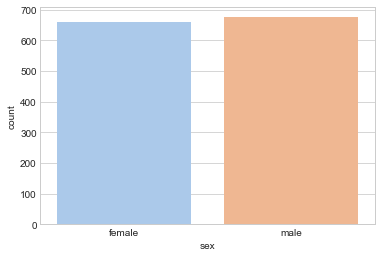

In [7]:
# sex
sns.countplot(x = df['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

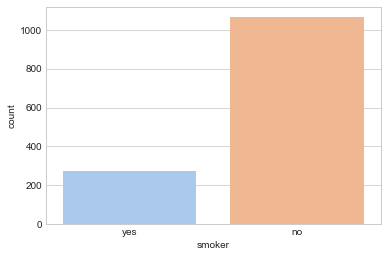

In [8]:
# smoker
sns.countplot(x = df['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

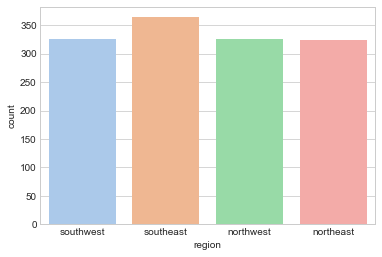

In [9]:
# region
sns.countplot(x = df['region'])

<AxesSubplot:xlabel='weight', ylabel='count'>

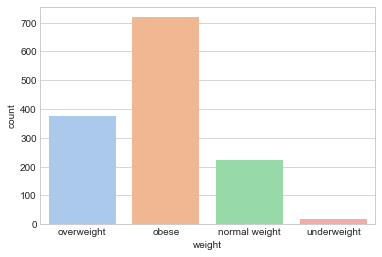

In [10]:
sns.countplot(x = df['weight'])

<AxesSubplot:xlabel='weight', ylabel='charges'>

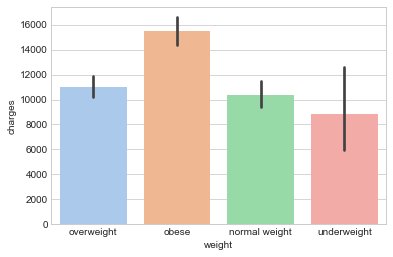

In [11]:
sns.barplot(x = 'weight', y = 'charges', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

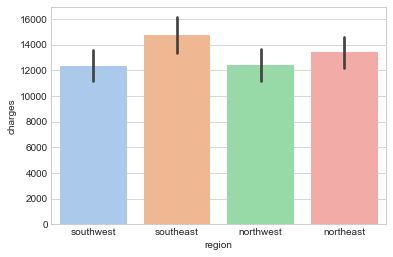

In [12]:
sns.barplot(x = 'region', y = 'charges', data = df)

<AxesSubplot:xlabel='weight', ylabel='count'>

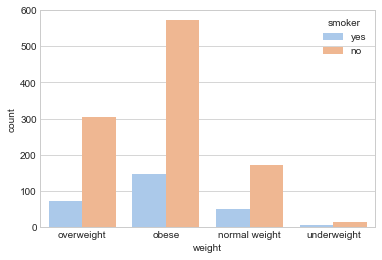

In [13]:
sns.countplot(x = df['weight'], hue = df['smoker'])

<AxesSubplot:xlabel='weight', ylabel='children'>

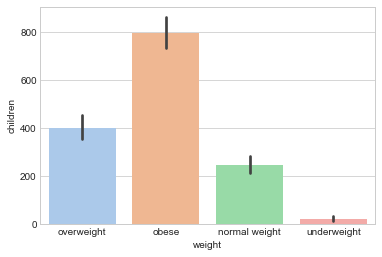

In [14]:
sns.barplot(x = df['weight'], y = df['children'], estimator=np.sum)

<AxesSubplot:xlabel='weight', ylabel='count'>

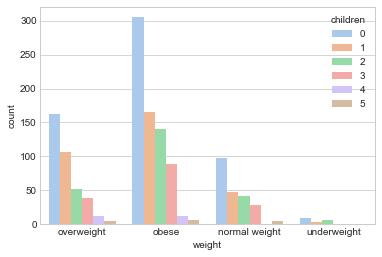

In [15]:
sns.countplot(x = df['weight'], hue = df['children'])

#### Observation
1. There are more obese people than other weight categories
2. The non smokers are twice as many as the smokers
3. The region of an individual does not necessarily impact their insurance charges
4. Obese individuals tend to pay more in insurance charges

## EDA for numerical data

In [16]:
def summarize(feature):
    mn = df[feature].min()
    mx = df[feature].max()
    q1 = df[feature].quantile(0.25)
    q2 = df[feature].quantile(0.50)
    q3 = df[feature].quantile(0.75)
    mean = df[feature].mean()
    std = df[feature].std()
    print(f"Min Value: {mn}\nMax Value: {mx}\nQ1: {q1}\nQ2: {q2}\nQ3: {q3}\nMean: {mean}\nSTD: {std}")

In [17]:
# Age
summarize('age')

Min Value: 18
Max Value: 64
Q1: 27.0
Q2: 39.0
Q3: 51.0
Mean: 39.20702541106129
STD: 14.049960379216172


<AxesSubplot:xlabel='age'>

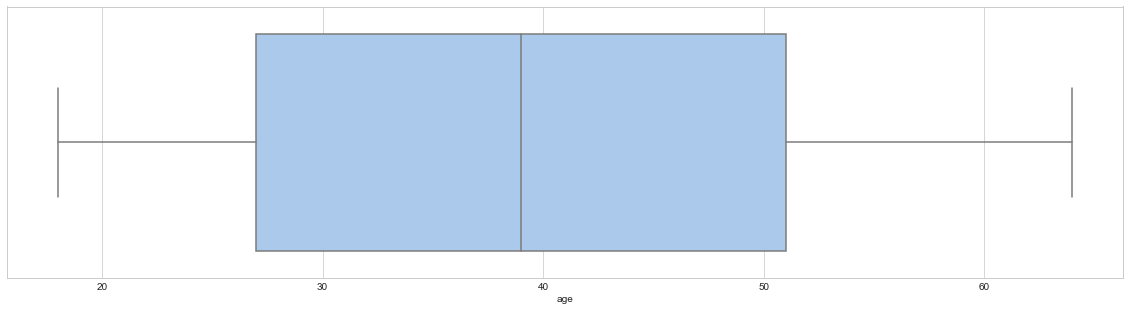

In [18]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df['age'])

In [21]:
#pip install -U seaborn

<AxesSubplot:xlabel='age', ylabel='Count'>

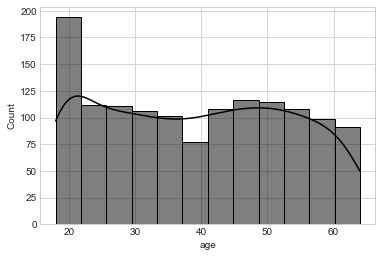

In [24]:
sns.histplot(x = df['age'], kde = True, color='black')

#### Observation

1. There is no outlier in Age Feature
2. Age Feature is Uniformly Distributed
3. Has Min value : 18
4. Max Value : 64
5. Median : 39
6. Mean: 39.2 + 14.04 OR 39.2 - 14.04

In [25]:
# bmi

summarize('bmi')

Min Value: 15.96
Max Value: 53.13
Q1: 26.29625
Q2: 30.4
Q3: 34.69375
Mean: 30.663396860986538
STD: 6.098186911679017


<AxesSubplot:xlabel='bmi'>

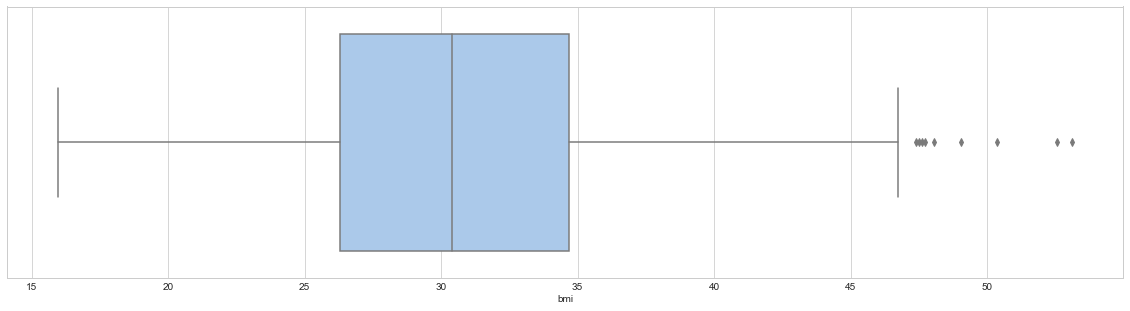

In [26]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

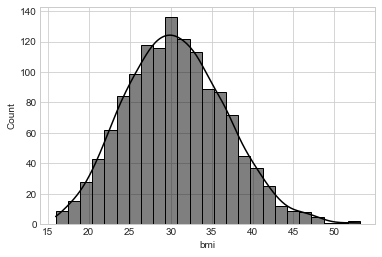

In [27]:
sns.histplot(x = df['bmi'], kde = True, color='black')

In [29]:
# Who is the max BMI ?
df[ df['bmi'] == df['bmi'].max() ]

,age,sex,bmi,children,smoker,region,charges,weight
1317,18,male,53.13,0,no,southeast,1163.4627,obese


In [30]:
# Who is the min BMI ?
df[ df['bmi'] == df['bmi'].min() ]

,age,sex,bmi,children,smoker,region,charges,weight
172,18,male,15.96,0,no,northeast,1694.7964,underweight


In [31]:
# We will get the mean of Charges to compare with the max BMI
df['charges'].mean()

13270.422265141257

#### Observation

1. BMI distribution approximately follow Normal Distribution
2. Max value is 53.13 he is a Male with 18 years old Live in Southeast
3. He is paying charges Less than Average charges and he is non-smoker and we mention that Smokers pay more charges    and BMI doesn't affect the charges

In [32]:
# charges
summarize('charges')

Min Value: 1121.8739
Max Value: 63770.42801
Q1: 4740.28715
Q2: 9382.033
Q3: 16639.912515
Mean: 13270.422265141257
STD: 12110.011236693994


<AxesSubplot:xlabel='charges'>

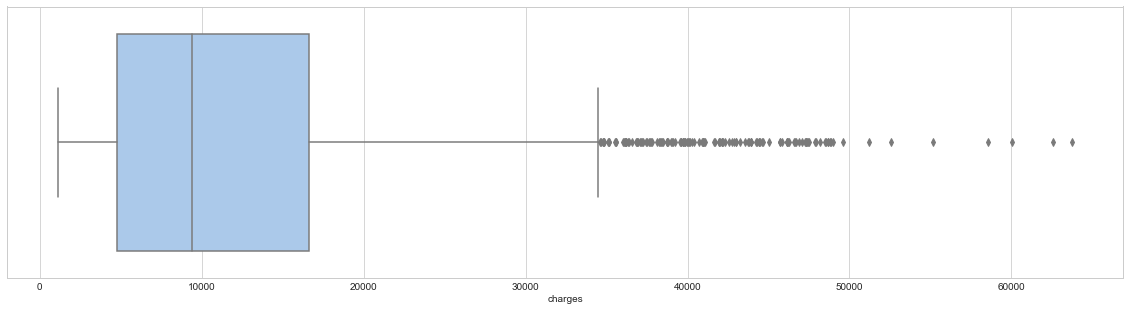

In [33]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

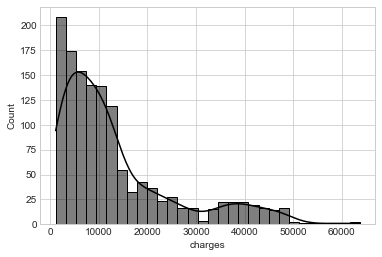

In [34]:
sns.histplot(x = df['charges'], kde = True, color='black')

In [35]:
# Who Pay More Charges ?!
df[ df['charges'] == df['charges'].max() ]

,age,sex,bmi,children,smoker,region,charges,weight
543,54,female,47.41,0,yes,southeast,63770.42801,obese


In [36]:
# Who Pay Min Charges ?!
df[ df['charges'] == df['charges'].min() ]

,age,sex,bmi,children,smoker,region,charges,weight
940,18,male,23.21,0,no,southeast,1121.8739,normal weight


<AxesSubplot:xlabel='age', ylabel='charges'>

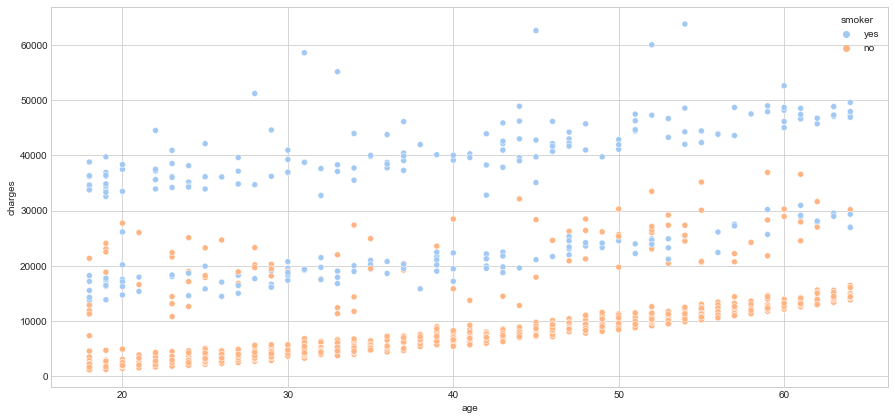

In [37]:
# scatter plot between age and charges
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['charges'], hue = df['smoker'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

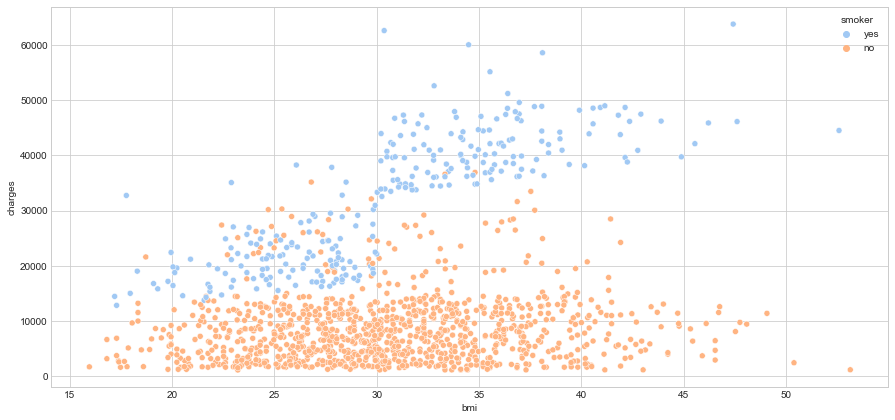

In [38]:
# scatter plot between bmi and charges
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['bmi'], y = df['charges'], hue = df['smoker'])

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


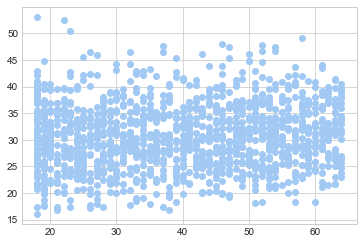

In [43]:
from scipy.stats import pearsonr,spearmanr
plt.scatter(df['age'],df['bmi'])

In [44]:
spearmanr(df['age'],df['bmi'])

SpearmanrResult(correlation=0.10773603532023862, pvalue=7.859093373677643e-05)

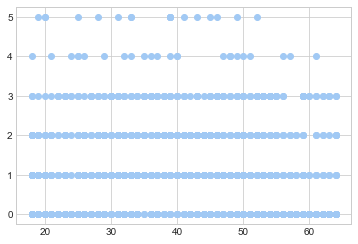

In [45]:
plt.scatter(df['age'],df['children'])

In [46]:
spearmanr(df['age'],df['children'])

SpearmanrResult(correlation=0.05699222356207542, pvalue=0.037119585120449834)

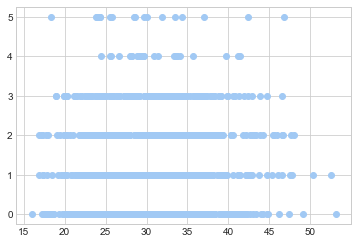

In [47]:
plt.scatter(df['bmi'],df['children'])

In [48]:
spearmanr(df['bmi'],df['children'])

SpearmanrResult(correlation=0.015606736191800299, pvalue=0.5684233654813481)

In [55]:
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df['weight']=le.fit_transform(df['weight'])

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2


In [71]:
X_ = df.drop('charges',axis=1)
y = df['charges']

In [72]:
model = LinearRegression()
# fit the model
model.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
importance = model.coef_
importance

array([  257.49716633,  -133.41468857,   333.28748355,   475.16999803,
       23806.07645296,  -352.59436005,  -407.03632376])

Feature: 0, Score: 257.49717
Feature: 1, Score: -133.41469
Feature: 2, Score: 333.28748
Feature: 3, Score: 475.17000
Feature: 4, Score: 23806.07645
Feature: 5, Score: -352.59436
Feature: 6, Score: -407.03632


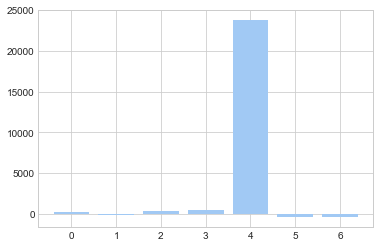

In [74]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [76]:
# Dropping nonimportant features
X1 = X_.drop(['sex','region','weight'],axis=1)

In [77]:
# Scaling features
scaled = StandardScaler()
X = scaled.fit_transform(X1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [81]:
#training the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [87]:
print("$R^2$ : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

$R^2$ :  0.7811147722517886
MAE : 4213.798594527248
RMSE: 5829.378521780667
